In [108]:
import pandas as pd

churn_df = pd.read_csv("datasets/telecom_churn_clean.csv")

churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [109]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3333 non-null   int64  
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

# kNN Classifier
The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [110]:
from sklearn.neighbors import KNeighborsClassifier
X = churn_df[["total_day_charge", "total_eve_charge"]].values #features
y = churn_df["churn"].values #Target values

#The .values convert these data into Numpy Arrays

In [111]:
print(X.shape, y.shape)

(3333, 2) (3333,)


In [112]:
knn = KNeighborsClassifier(n_neighbors=15) 
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

In [113]:
X_new = np.array([[56.8, 17.5], [24.4, 24.1], [50.1, 10.9]])
print(X_new.shape)

(3, 2)


In [114]:
#(3,2) here means it has 3 rows and 2 columns i.e 3 observations and 2 features

In [115]:
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))

Predictions: [1 0 0]


In [116]:
#Here Predictions: [1 0 0] means that 1 is churn and 0 is no churn

In [117]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["total_day_charge", "total_eve_charge"]].values #features
# X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [118]:
# X_new = np.array([[30.0, 17.5],
#                   [107.0, 24.1],
#                   [213.0, 10.9]])

X_new = np.array([[56.8, 17.5], [24.4, 24.1], [50.1, 10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: [1 0 0]


## Model Performance Measure...Train/test split

In [119]:
# Use train_test_split to split the dataset into training and testing sets.
# Pass the X and y features and targets to the function as well as your test size of 30%. 
# Stratify is used to keep the same proportions as the initial dataset. 
# Random state is used to enable reproducible results.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [120]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

#To predict the accuracy of our model we use knn.score
print(knn.score(X_test, y_test))

0.872


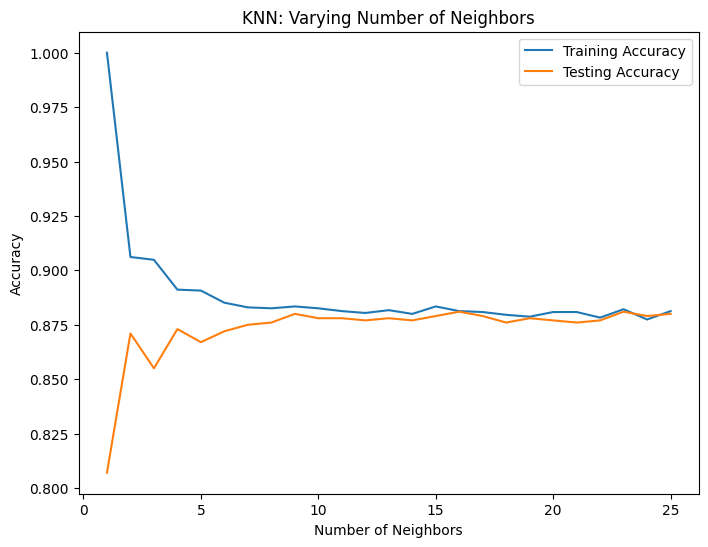

In [121]:
#model complexty and over/underfitting
import matplotlib.pyplot as plt

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

#### Judging from above plot, we can say from k=15, we start to experience overfitting
#### For the test set, accuracy peaks with 15 neighbors, suggesting it is the optimal value for our model. 

## Regression
used when the target variable has a continuos values such as price of a house, or a country GDP

In [122]:
import pandas as pd

diabetes_df = pd.read_csv("datasets/diabetes_clean.csv")

diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [123]:
#### creating feature and target arrays
X = diabetes_df.drop("glucose", axis=1).values # features
y = diabetes_df["glucose"].values #target variable

In [124]:
#### Making predictions from a single feature(e.g bmi)
X_bmi = X[:, 3]
print(X_bmi.shape, y.shape)

(768,) (768,)


In [125]:
## we need to transform our X_bmi to a 2D array for it to work on scikitlearn
X_bmi = X_bmi.reshape(-1, 1)

In [126]:
print(X_bmi.shape)

(768, 1)


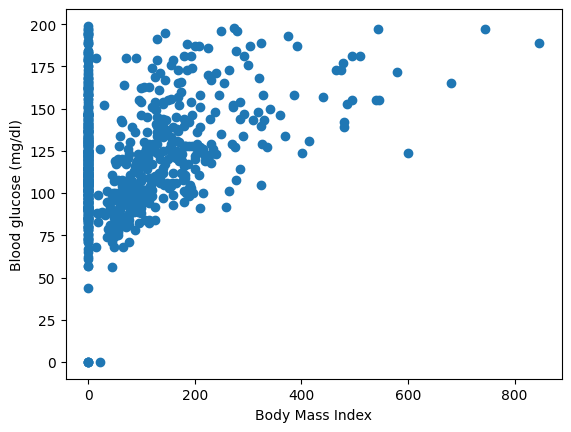

In [127]:
## plot glucose vs bmi
import matplotlib.pyplot as plt

plt.scatter(X_bmi, y)
plt.ylabel("Blood glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

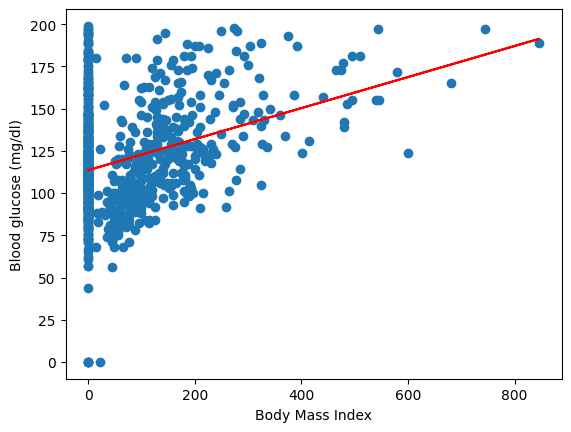

In [128]:
### Fitting - Building a Regression Model using Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color='red')
plt.ylabel("Blood glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

## Linear Regression using multiple variables

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

## R-squared = to check Linear Regression performance
reg_all.score(X_test, y_test)

Predictions: [119.91303675  95.70325357], Actual Values: [ 98 112]


0.28280468810375115

In [130]:
## the result above tells us that the feature only explains about 28% of the glucose level variance, not so good..

In [131]:
from sklearn.metrics import mean_squared_error

## RMSE = to also check Linear Regression performance
mean_squared_error(y_test, y_pred, squared=False)

26.341459582232265

Root Mean Square Error (RMSE) is a commonly used metric in machine learning to measure the accuracy of a regression model. It represents the square root of the average of the squared differences between the actual and predicted values. In your case, an RMSE of 26.341459582232265 means the following:

**Magnitude of Error:** The RMSE value of 26.34 indicates the typical magnitude of errors made by your machine learning model when making predictions. A lower RMSE value is desirable, as it means the model's predictions are closer to the actual values on average.

**Units:** The units of RMSE depend on the units of your target variable. For example, if you are predicting house prices in dollars, then the RMSE is measured in dollars. In this case, an RMSE of 26.34 dollars means that, on average, your model's predictions are off by approximately 26.34 dollars.

**Comparison:** To interpret the RMSE effectively, you need to compare it to the range of your target variable. If the range of the target variable is much larger than the RMSE (e.g., predicting house prices with a range of thousands of dollars), then an RMSE of 26.34 might be considered reasonably good. However, if the range of the target variable is much smaller than the RMSE, it may indicate that the model's performance is not as satisfactory.

**Relative Evaluation:** The meaning of RMSE also depends on the specific problem you're solving. To determine whether an RMSE of 26.34 is acceptable or not, you should consider the context of your application. Sometimes, a higher RMSE may be acceptable if the task doesn't require high precision.

In summary, an RMSE of 26.34 suggests that, on average, your model's predictions have an error of approximately 26.34 units in the same scale as your target variable. Whether this level of error is acceptable or not depends on the specific requirements and context of your machine learning application. It's often helpful to compare the RMSE to the range of your target variable and consider whether further model improvement is needed.



#### RMSE = 26...RMSE measures the average difference between values predicted by a model and the actual values.
 The Root Mean Squared Error (RMSE) is one of the two main performance indicators for a regression model. It measures the average difference between values predicted by a model and the actual values. It provides an estimation of how well the model is able to predict the target value (accuracy).

 The lower the value of the Root Mean Squared Error, the better the model is. A perfect model (a hypothetic model that would always predict the exact expected value) would have a Root Mean Squared Error value of 0.
 
 ##### The Root Mean Squared Error can be interpreted as the standard deviation of the error (it's the square root of the error variance).
 
https://help.sap.com/docs/SAP_PREDICTIVE_ANALYTICS/41d1a6d4e7574e32b815f1cc87c00f42/5e5198fd4afe4ae5b48fefe0d3161810.html

Loss functions take the model’s predicted values and compare them against the actual values. It estimates how well (or how bad) the model is, in terms of its ability in mapping the relationship between X (a feature, or independent variable, or predictor variable) and Y (the target, or dependent variable, or response variable). Sometimes just knowing how bad the model is performing may not be enough, we might also need to calculate how far off the model is from the actual value. By knowing the amount of deviation between the predicted value and the actual value, we can train our model accordingly. This difference between the actual value and the predicted value is called the loss. A high loss value means the model has poor performance.

https://www.analyticsvidhya.com/blog/2021/10/evaluation-metric-for-regression-models/

### Cross validation
Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.

Cross-validation is a technique used to test how good a machine learning model is at making predictions, and it's kind of like having a teacher check your homework.

Imagine you have a big set of data that you want to use to train a machine learning model. You want to know if your model is really good at learning from this data or if it's just memorizing things and won't work well on new, unseen data.

Here's where cross-validation comes in:

1. **Splitting the Data**: Instead of using all your data for training, you split it into two parts: a "training set" and a "testing set." The training set is like your practice material, and the testing set is like a test that your model hasn't seen before.

2. **Multiple Tests**: Cross-validation isn't just one test; it's like doing the test several times. You split your data into different training and testing sets multiple times, and each time, you train your model on one part and test it on another.

3. **Checking Performance**: After each test, you see how well your model did on the testing set. Did it make good predictions or not?

4. **Average Results**: You repeat this testing process multiple times (typically 5 or 10 times), and you calculate the average of all the test results. This gives you a more reliable measure of how well your model is likely to perform on new, unseen data.

The idea is that by doing multiple tests with different data, you can get a better sense of how well your model will work in the real world, not just on the data you used for training.

Think of it like taking practice exams with different questions to make sure you really understand the material, and your average score gives you a good estimate of how you'll perform on the real exam. Cross-validation helps ensure that your machine learning model is genuinely learning from the data and not just "cheating" by memorizing it.

In [132]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42) #We are splitting this into 6 folds

reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

print(cv_results) # the default score for linear regression, R-Squared is returned

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]


### Analyzing cross-validation metrics

In [133]:
# Print the mean
print('Mean: ', np.mean(cv_results))

# Print the standard deviation
print('Std. Deviation: ', np.std(cv_results))

# Print the 95% confidence interval - a 95% confidence i.e it ranges from 2.5% to 97.5%.
print(np.quantile(cv_results, [0.025, 0.975]))

Mean:  0.31909697867344783
Std. Deviation:  0.07015320610114176
[0.24088592 0.41580685]


### Regularized Regression
a technique used to avoid overfitting

Imagine you're training a machine learning model to predict house prices based on various features like square footage, number of bedrooms, and distance to the nearest grocery store.

Without regularization, your model might go all out and assign super high importance to, let's say, square footage. So, it becomes a square footage fanatic, fitting the training data perfectly by relying too much on this one feature.

Regularization steps in like a wise mentor and says, "Hey, chill out! We want a well-rounded model, not a square footage calculator." It adds a penalty term to the training process, making sure that no single feature dominates too much. So, even if square footage is crucial, the model learns to consider other features too, preventing it from becoming overly specialized and losing its ability to generalize to new houses. It's like teaching your model to be a real estate expert, not just a square footage specialist.

### Ridge Regression


Ridge penalizes the large positive or nagative coefficient
Alpha is the hyperparameter: a variable used to optimize model parameters
Alpha controls the model complexity

if alpha = 0 = OLS (means we are performing OLS, where large coefficients are not penalized and overfitting may occur)

A high alpha means large coefficients are severely penalized and can lead to underfitting

In [146]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    # Obtain R-squared
    score = ridge.score(X_test, y_test)
    scores.append(score)
print(scores)

[0.2828466623222221, 0.28320633574804754, 0.2853000732200004, 0.26423984812668133, 0.19292424694100963]


#### from the above we can see that the performance gets worse as alpha increases

### Lasso regression

In [142]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

[0.2831114455475573, 0.29795609755827845, 0.17989838789273882, 0.18127361610181125, 0.15679544303617965]


- Lasso regression can select important features of a dataset
- Shrinks the coefficients of a less important features to zero
- the features whose coefficients are not shrunk to zero are selected by lasso

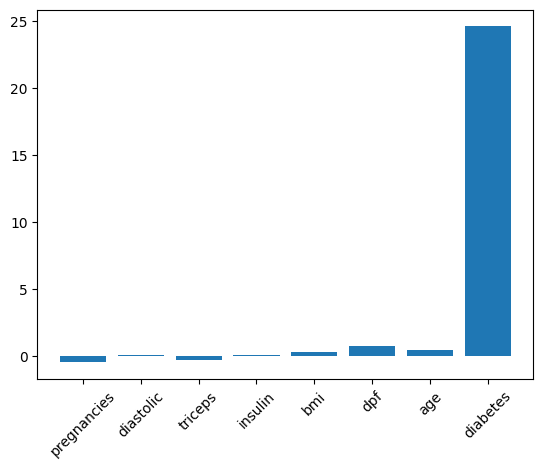

In [145]:
## Lasso for feature selection in scikit-learn
from sklearn.linear_model import Lasso
X = diabetes_df.drop("glucose", axis=1).values # features
y = diabetes_df["glucose"].values #target variable
names = diabetes_df.drop("glucose", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

##### we can see that the most important predictor for our target variable(glucose), i.e the value whether an individual has diabetes or not

## Confusion matrix and Classification report
https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/?utm_source=reading_list&utm_medium=https://www.analyticsvidhya.com/blog/2021/10/evaluation-metric-for-regression-models/

It helps us evaluate how our model performed and where it went wrong and offers us guidance to correct our path.
A confusion matrix is a performance evaluation tool in machine learning, representing the accuracy of a classification model. It displays the number of true positives, true negatives, false positives, and false negatives. This matrix aids in analyzing model performance, identifying mis-classifications, and improving predictive accuracy.



In [169]:
###confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=7)
y = churn_df["churn"].values
X = churn_df[["total_day_charge", "total_eve_charge"]].values #features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

[[1111   27]
 [ 142   54]]


##### above means it produced 54 true positives, 27 false positives. Precision was more than 50%

## Fine-Tuning Your Model

### Logistic Regression for binary classification
- It is used for classification problems
- outputs probabilities
- if probability, p > 0.5, we label 1, and p < 0.5, we label 0

In [163]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

y = churn_df["churn"].values
X = churn_df[["total_day_charge", "total_eve_charge"]].values #features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

## predicting probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])

0.18826020038112667


#### with this probability above, we can say the first observation has churned
By default the logistic regression threshold = 0.5
We can use a receiver operating characteristic, or ROC curve, to visualize how different thresholds affect true positive and false positive rates.

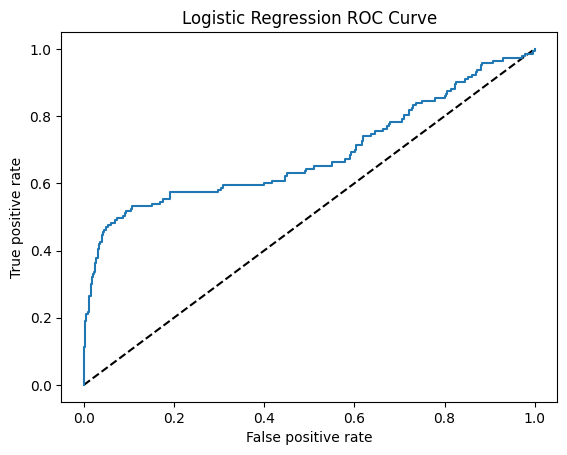

In [165]:
### ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs) # fpr - false positive rate, tpr - true positive rate

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [167]:
## we can evaluate the model's performance, by calculating the area under the ROC curve, called the AUC
## with scores ranging from 0 - 1, with 1 to be perfect
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.6870364174914934


#### The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

## Hyperparameter tuning

Remember in Ridge/Lasso regression, we chose alpha..in KNN we chose n_neighbors
Parameters we specify before fitting the model like alpha and n_neighbors are called Hyperparameter

Hyperparameter tuning involves trying lots of Hyperparameter values, fit all of them separately, see how well they perform and choose the best performing values.

- It is essential to use cross-validation to avoid overfitting to the test set
- We can still split the data and perform cross-validation on the training set
- We withhold the test set for the final evaluation